<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Data_Envelopment_Analysis_Norwegian_Firm's_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Envelopment Analysis for Norwegian Firm's Performance using cis dataset
## Visualize Efficiency Scores:
### Using plots to display the distribution of efficiency scores across all DMUs.


                                DMU     Score  Rank
0  Fishing_trapping_and_aquaculture  0.524590    44
1             Mining_and_extraction  1.000000     1
2                     Food_industry  0.804017    39
3                 Beverage_industry  1.000000     1
4                  Textile_industry  1.000000     1


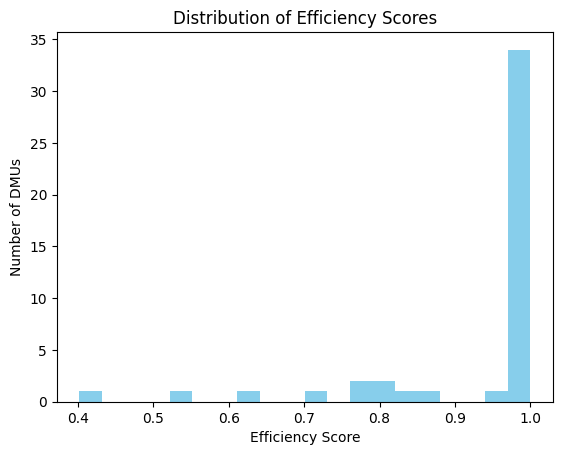

Efficient DMUs:
                                                  DMU  Score  Rank
1                               Mining_and_extraction    1.0     1
3                                   Beverage_industry    1.0     1
4                                    Textile_industry    1.0     1
5                                   Clothing_industry    1.0     1
6                  Leather_and_leather_goods_industry    1.0     1
7                   Lumber_and_wood_products_industry    1.0     1
8                       Paper_and_stationery_industry    1.0     1
9                           Printing_graphic_industry    1.0     1
10              Petroleum_coal_and _chemical_industry    1.0     1
11                            Pharmaceutical_industry    1.0     1
12                       Rubber_and_plastics_industry    1.0     1
15                               Metal_goods_industry    1.0     1
16                   Computer_and_electronic_industry    1.0     1
17                          Electrotechnical_i

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/Result_Envelopment.csv')

# Display summary of efficiency scores
print(df[['DMU', 'Score', 'Rank']].head())

# Plot distribution of scores
plt.hist(df['Score'], bins=20, color='skyblue')
plt.title('Distribution of Efficiency Scores')
plt.xlabel('Efficiency Score')
plt.ylabel('Number of DMUs')
plt.show()

# Identify efficient DMUs
efficient_dmus = df[df['Score'] == 1]
print("Efficient DMUs:")
print(efficient_dmus[['DMU', 'Score', 'Rank']])


## Data Visualization:

### Efficiency Scores: Create a histogram of efficiency scores to visualize the distribution.
### Slack Analysis: Plot the slack movements to identify areas where industries can reduce excess resources.
### Projections: Visualize the ideal target projections for inefficient industries.

## Benchmark Analysis:

### Identify industries serving as benchmarks for others and the frequency of their use.

## Dual Price Insights:

### Determine which input/output has the highest dual price to prioritize potential improvements.

            Score        Rank  Proportionate Movement(Innovation_activity)  \
count  135.000000  135.000000                                   135.000000   
mean     0.935033   11.266667                                    -4.085216   
std      0.136200   17.182167                                     8.394583   
min      0.401798    1.000000                                   -33.499339   
25%      0.975732    1.000000                                    -1.625983   
50%      1.000000    1.000000                                     0.000000   
75%      1.000000   34.000000                                    -0.000000   
max      1.000000   45.000000                                     0.000000   

       Proportionate Movement(Product_bus_proc_innovation)  \
count                                         135.000000     
mean                                           -3.666403     
std                                             7.575469     
min                                           -31

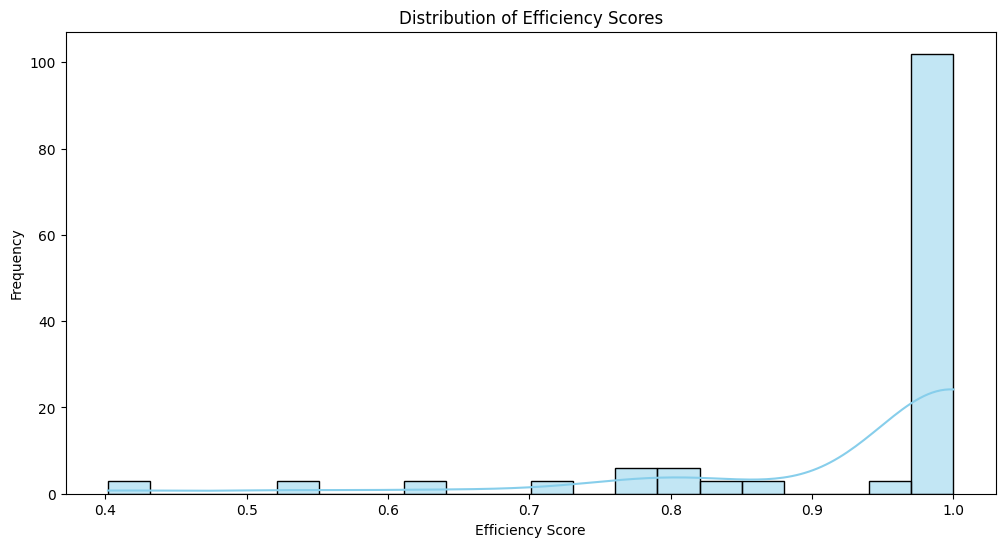

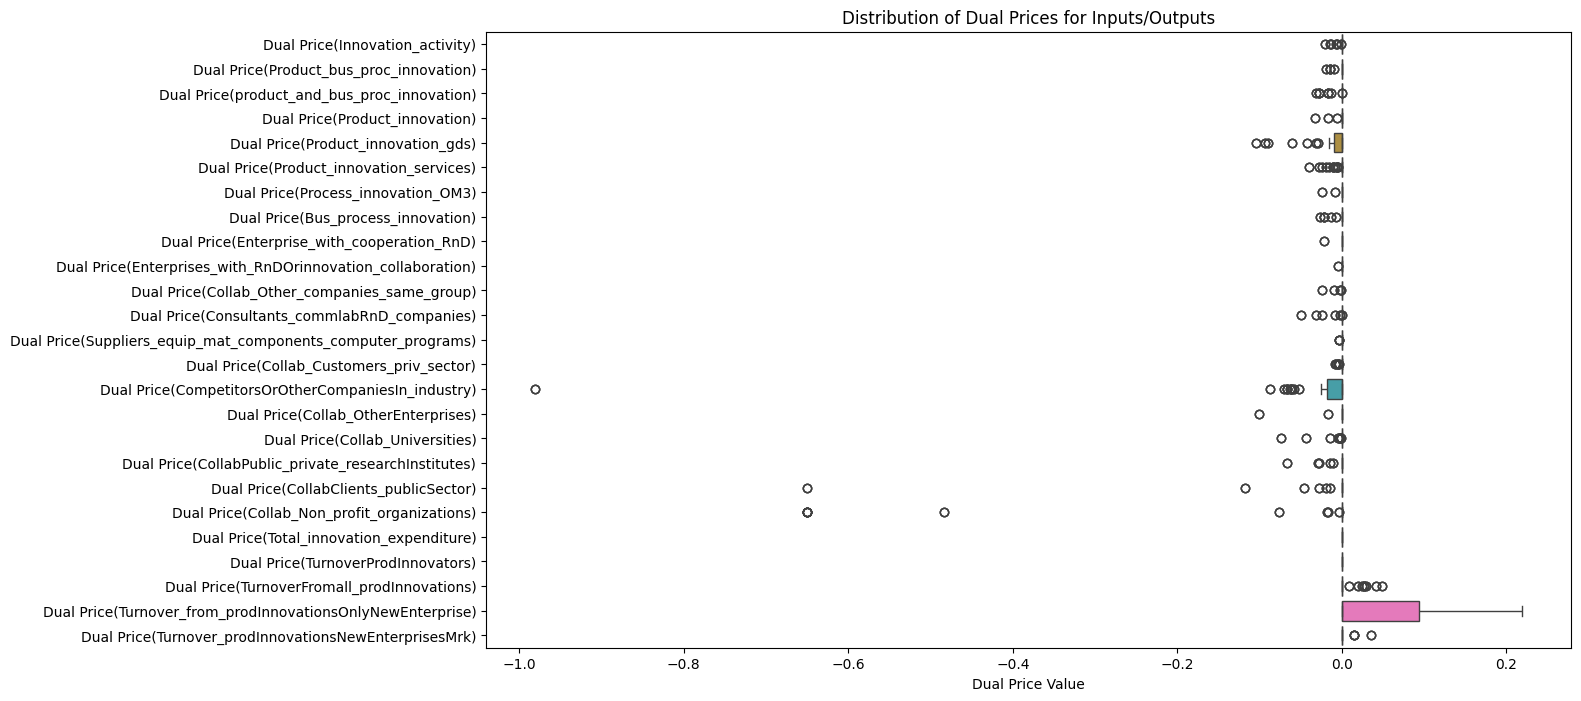

Top DMUs serving as benchmarks:
                                   DMU  Benchmark Count
14                      Metal_industry                7
14                      Metal_industry                7
14                      Metal_industry                7
43  Travel_agencies_and_tour_operators                6
31                 Publishing_business                6
37             Financing_and_insurance                6
35                         IT_services                6
37             Financing_and_insurance                6
43  Travel_agencies_and_tour_operators                6
43  Travel_agencies_and_tour_operators                6


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the full data
df_part1 = pd.read_csv('/content/Result_Envelopment.csv')
df_part2 = pd.read_csv('/content/Result_Envelopment.csv')
df_part3 = pd.read_csv('/content/Result_Envelopment.csv')

# Combine parts into a single DataFrame
df = pd.concat([df_part1, df_part2, df_part3], axis=0)

# Clean and prepare data
df.fillna(0, inplace=True)  # Handle missing values if necessary

# Display summary statistics
print(df.describe())

# Plot efficiency score distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Efficiency Scores')
plt.xlabel('Efficiency Score')
plt.ylabel('Frequency')
plt.show()

# Plot dual prices for key inputs/outputs
plt.figure(figsize=(14, 8))
dual_price_columns = [col for col in df.columns if 'Dual Price' in col]
sns.boxplot(data=df[dual_price_columns], orient='h')
plt.title('Distribution of Dual Prices for Inputs/Outputs')
plt.xlabel('Dual Price Value')
plt.show()

# Identify top benchmarks
df['Benchmark Count'] = df['Benchmark(lambda)'].apply(lambda x: len(x.split(';')))
benchmarks = df[['DMU', 'Benchmark Count']].sort_values(by='Benchmark Count', ascending=False)
print("Top DMUs serving as benchmarks:")
print(benchmarks.head(10))


## Answer Questions:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('/content/Result_Envelopment.csv')
# print(df.head())

ColumnNames = df.columns
print(ColumnNames)

Index(['DMU', 'Score', 'Rank', 'Benchmark(lambda)',
       'Proportionate Movement(Innovation_activity)',
       'Proportionate Movement(Product_bus_proc_innovation)',
       'Proportionate Movement(product_and_bus_proc_innovation)',
       'Proportionate Movement(Product_innovation)',
       'Proportionate Movement(Product_innovation_gds)',
       'Proportionate Movement(Product_innovation_services)',
       ...
       'Dual Price(Collab_Universities)',
       'Dual Price(CollabPublic_private_researchInstitutes)',
       'Dual Price(CollabClients_publicSector)',
       'Dual Price(Collab_Non_profit_organizations)',
       'Dual Price(Total_innovation_expenditure)',
       'Dual Price(TurnoverProdInnovators)',
       'Dual Price(TurnoverFromall_prodInnovations)',
       'Dual Price(Turnover_from_prodInnovationsOnlyNewEnterprise)',
       'Dual Price(Turnover_prodInnovationsNewEnterprisesMrk)',
       'RTS Constant'],
      dtype='object', length=105)


<ipython-input-10-4c4db0afcea1>:77: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()



Summary Statistics for Efficiency Scores:
count    45.000000
mean      0.935033
std       0.137228
min       0.401798
25%       0.975732
50%       1.000000
75%       1.000000
max       1.000000
Name: Score, dtype: float64

Mean Efficiency Scores by KIBS vs Non-KIBS:
is_kibs
False    0.935033
Name: Score, dtype: float64

Correlation between collaboration and turnover movements: -0.204

Correlation between RTS Constant and Efficiency Score:
0.020768842238603258


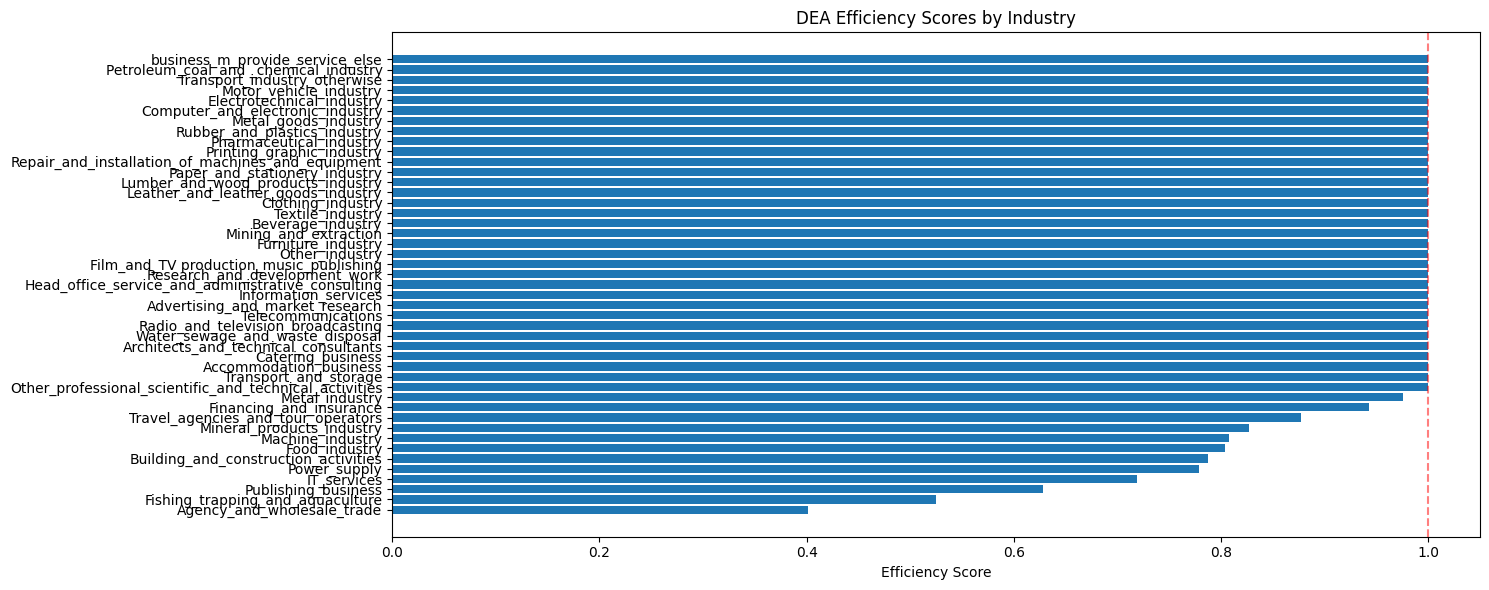

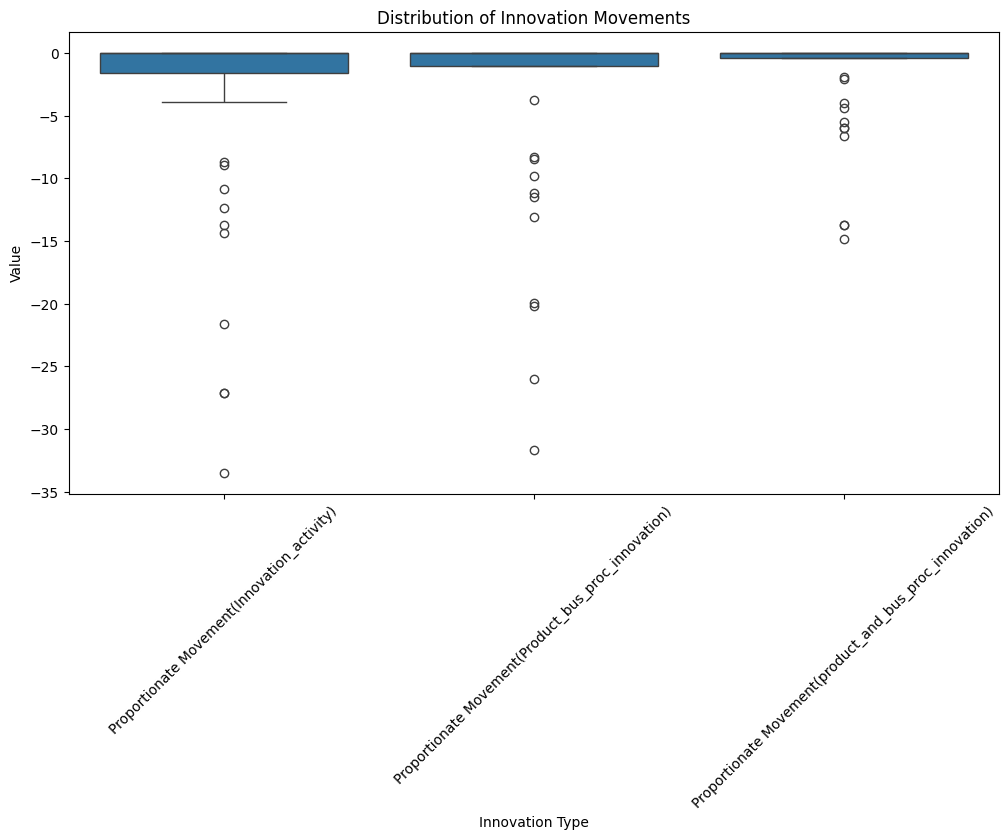

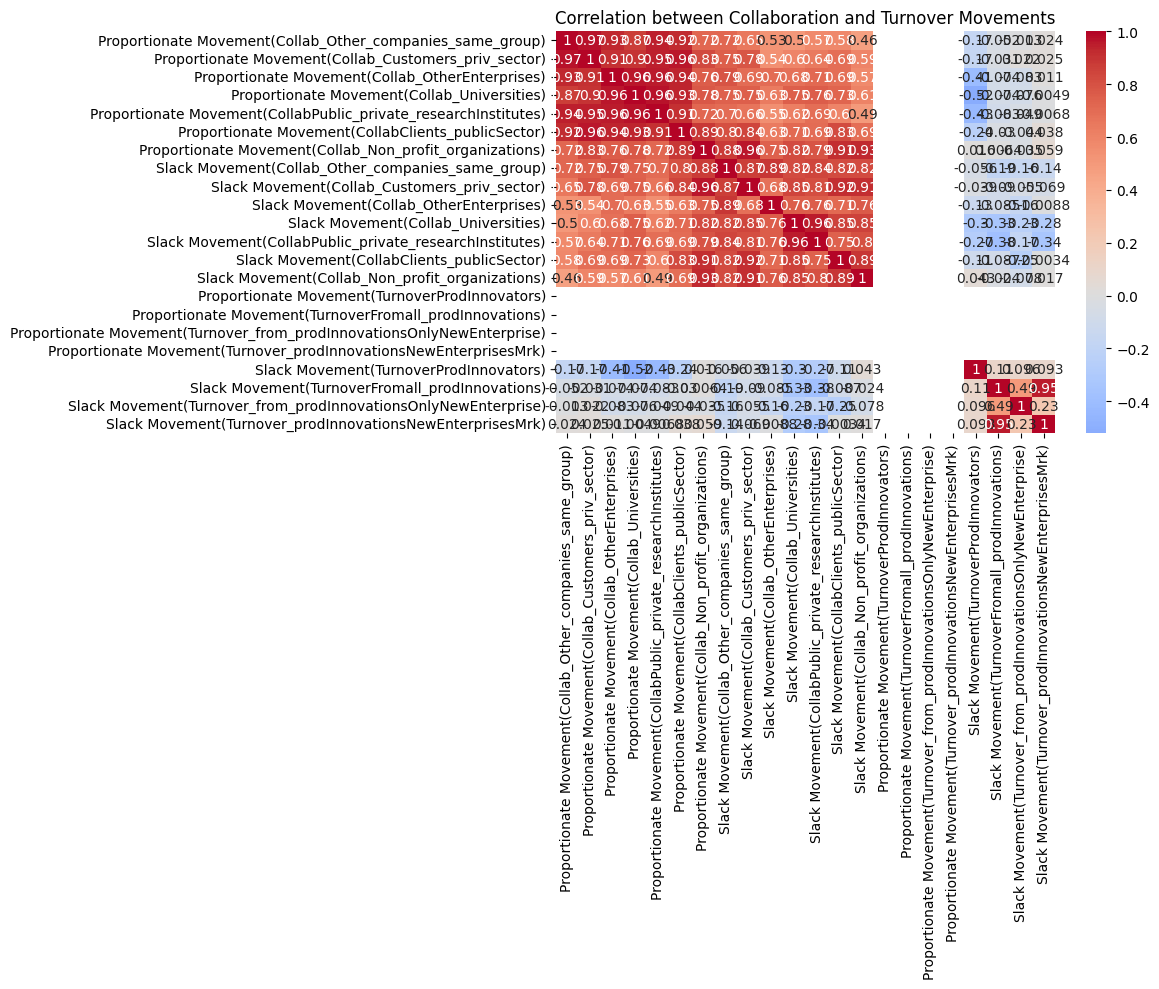

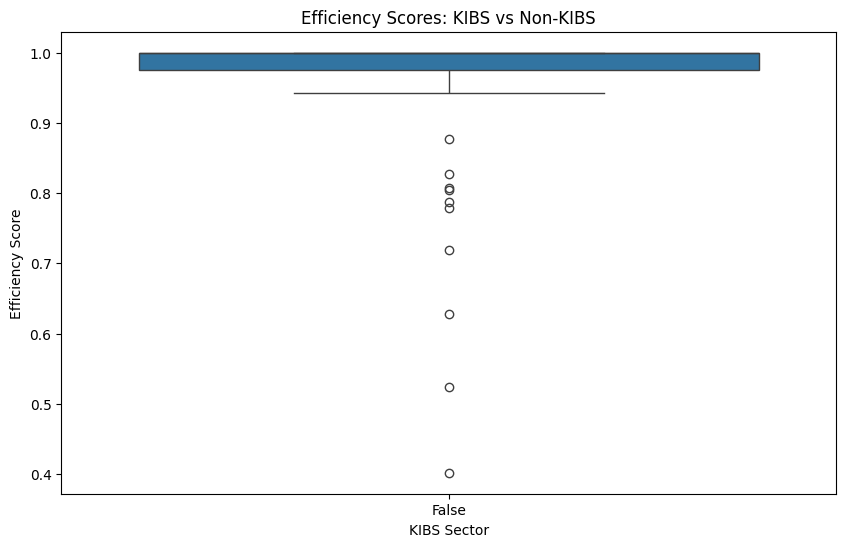

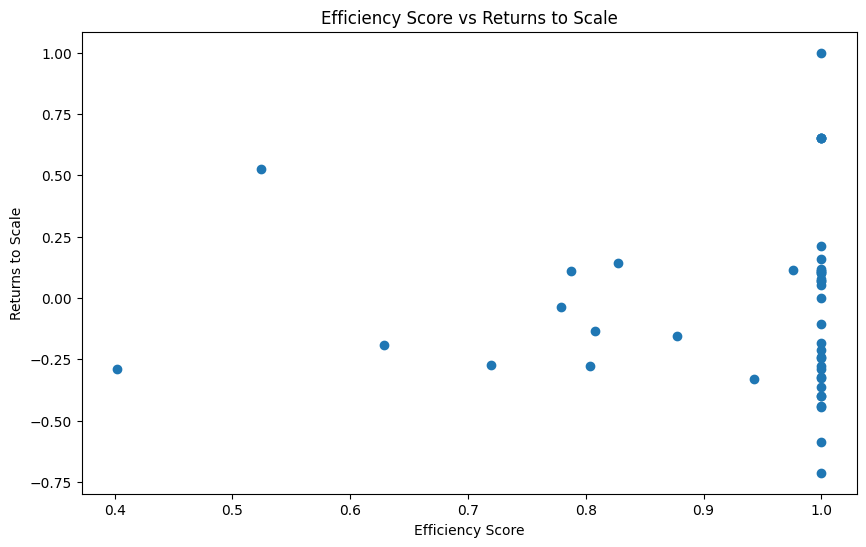

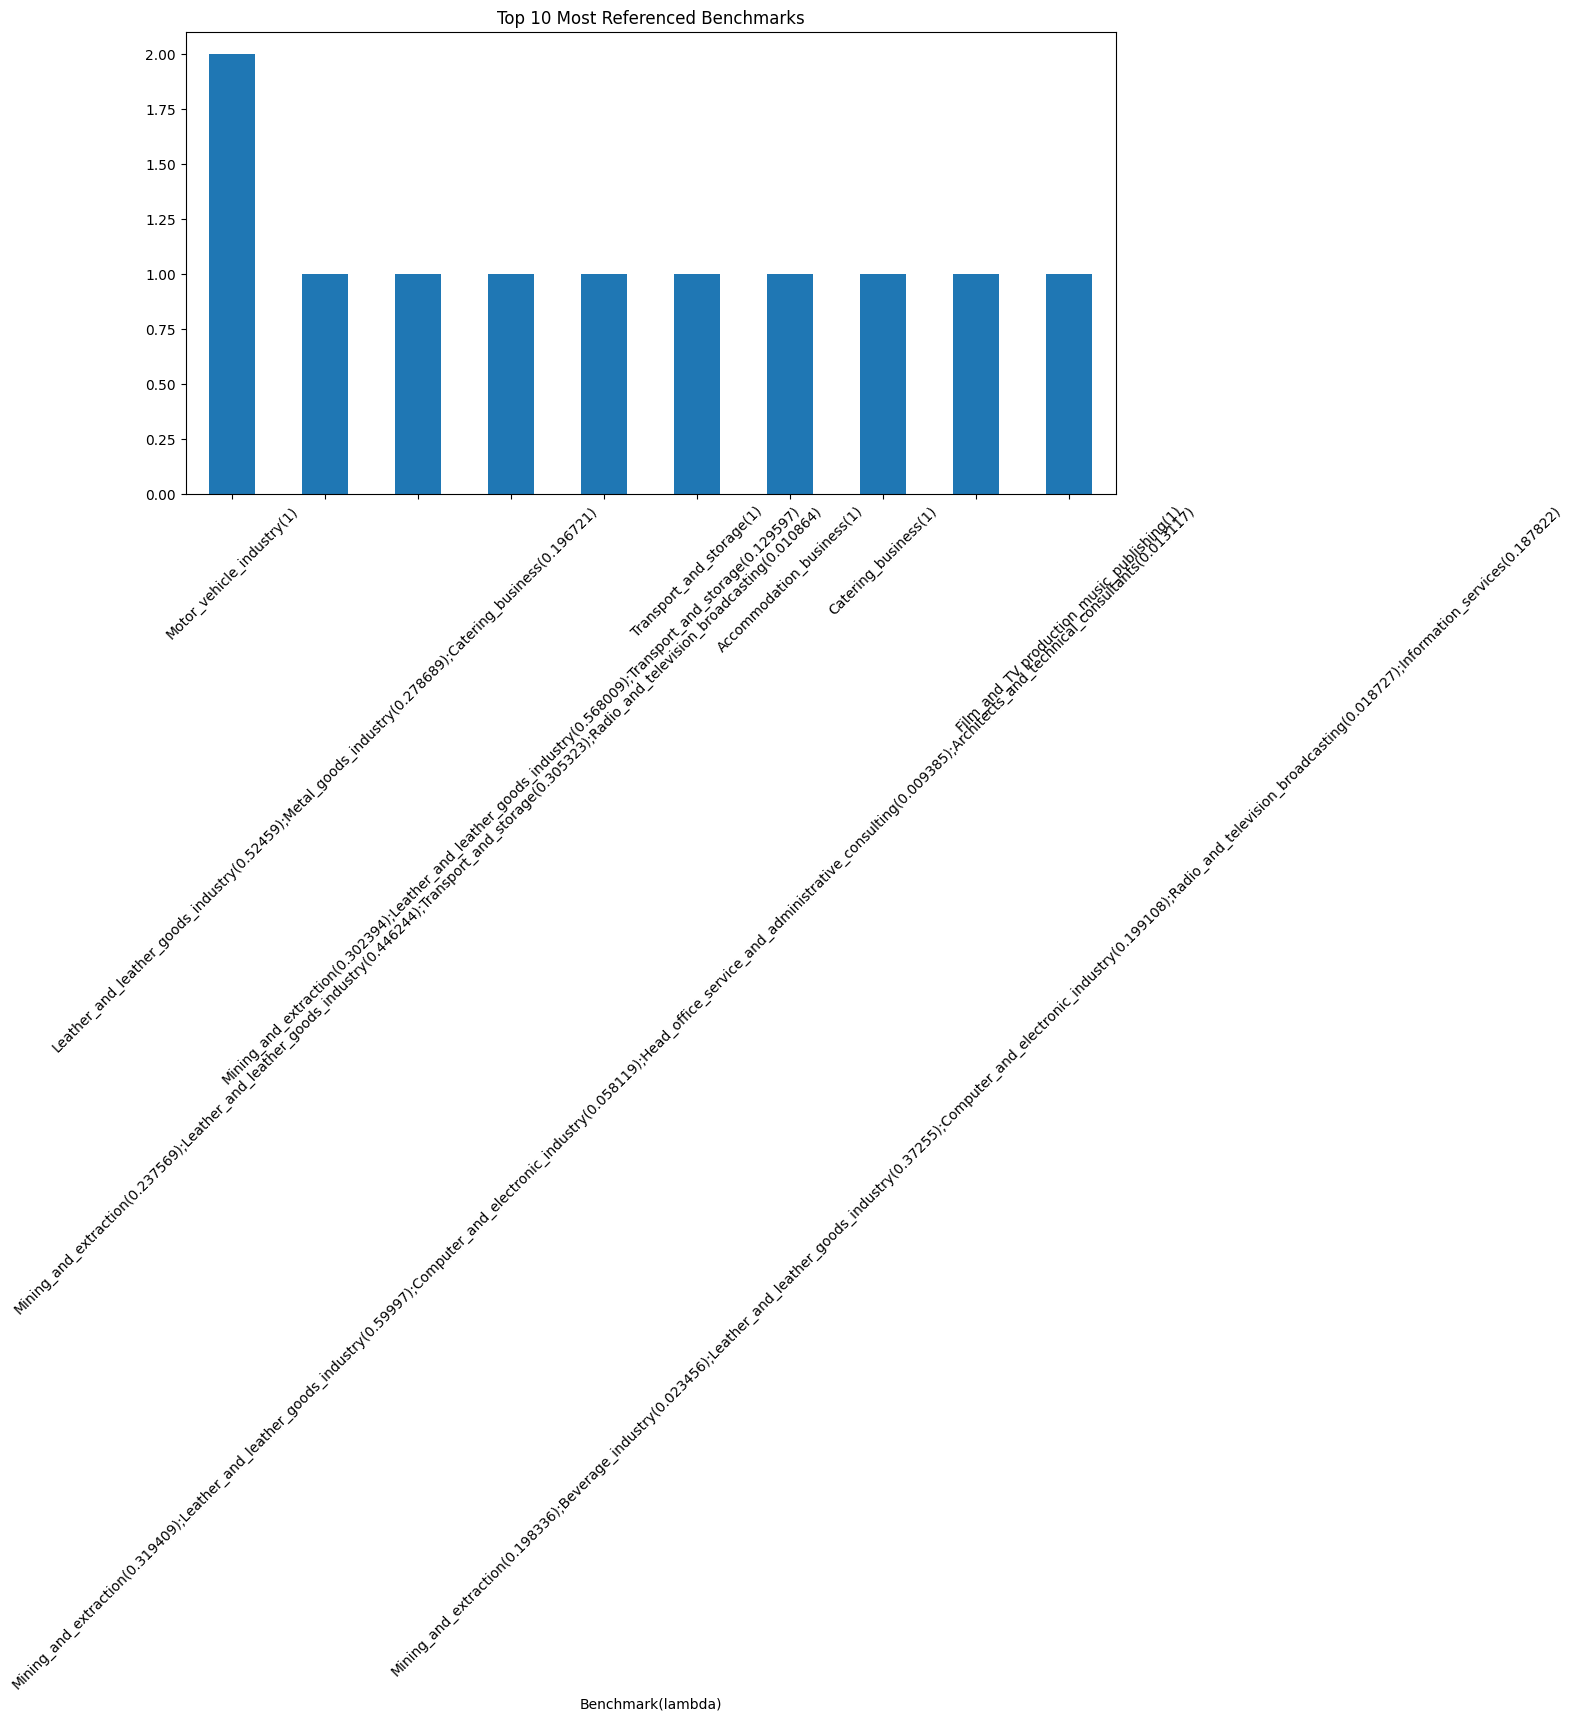

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('/content/Result_Envelopment.csv')

# 1. Efficiency Score Analysis
plt.figure(figsize=(15, 6))
scores = df[['DMU', 'Score']].sort_values('Score', ascending=True)
plt.barh(scores['DMU'], scores['Score'])
plt.xlabel('Efficiency Score')
plt.title('DEA Efficiency Scores by Industry')
plt.axvline(x=1, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()

# 2. Innovation Movement Analysis
innovation_cols = [
    'Proportionate Movement(Innovation_activity)',
    'Proportionate Movement(Product_bus_proc_innovation)',
    'Proportionate Movement(product_and_bus_proc_innovation)'
]
innovation_df = df[['DMU'] + innovation_cols].melt(
    id_vars=['DMU'],
    var_name='Innovation Type',
    value_name='Value'
)

plt.figure(figsize=(12, 6))
sns.boxplot(data=innovation_df, x='Innovation Type', y='Value')
plt.xticks(rotation=45)
plt.title('Distribution of Innovation Movements')

# 3. Collaboration Impact Analysis
collab_cols = [col for col in df.columns if 'Collab' in col and 'Movement' in col]
turnover_cols = [col for col in df.columns if 'Turnover' in col and 'Movement' in col]

# Calculate correlation matrix
correlation_matrix = df[collab_cols + turnover_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Collaboration and Turnover Movements')
plt.tight_layout()

# 4. Industry Comparison
# Assuming KIBS sectors
kibs_sectors = [
    'Technical_testing_and_analysis',
    'Research_and_development',
    'IT_and_information_services',
    'Management_consultancy'
]

df['is_kibs'] = df['DMU'].isin(kibs_sectors)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_kibs', y='Score')
plt.title('Efficiency Scores: KIBS vs Non-KIBS')
plt.xlabel('KIBS Sector')
plt.ylabel('Efficiency Score')

# 5. RTS Analysis
plt.figure(figsize=(10, 6))
plt.scatter(df['Score'], df['RTS Constant'])
plt.xlabel('Efficiency Score')
plt.ylabel('Returns to Scale')
plt.title('Efficiency Score vs Returns to Scale')

# 6. Benchmark Analysis
benchmark_counts = df['Benchmark(lambda)'].value_counts()
plt.figure(figsize=(12, 6))
benchmark_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Referenced Benchmarks')
plt.xticks(rotation=45)
plt.tight_layout()

# Statistical Analysis
print("\nSummary Statistics for Efficiency Scores:")
print(df['Score'].describe())

print("\nMean Efficiency Scores by KIBS vs Non-KIBS:")
print(df.groupby('is_kibs')['Score'].mean())

# Calculate average movements
collab_movement = df[collab_cols].mean(axis=1)
turnover_movement = df[turnover_cols].mean(axis=1)

correlation = np.corrcoef(collab_movement, turnover_movement)[0,1]
print(f"\nCorrelation between collaboration and turnover movements: {correlation:.3f}")

# Additional analysis for RQ4
print("\nCorrelation between RTS Constant and Efficiency Score:")
print(df['Score'].corr(df['RTS Constant']))

# Show all plots
plt.show()